In [1]:
# Bidirectional RNN 구현

import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 로드하여 준비, 샘플 값을 정수에서 부동소수로 변환
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()



# 이미지 입력 벡터 차원 조절

train_images = train_images / 255.0
test_images = test_images / 255.0

print(train_labels[:10])


one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)



# 신경망 구
model = tf.keras.models.Sequential()
model.add(Bidirectional(SimpleRNN(units=64, return_sequences = True),input_shape = (28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 학습 과정 설정
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습 수
history = model.fit(train_images, one_hot_train_labels, epochs=5, batch_size=10)



print("\n====================test results=====================")
labels=model.predict(test_images)
print("\n Accuracy: %.4f" % (model.evaluate(test_images, one_hot_test_labels)[1]))

fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%fd' % np.argmax(labels[i]))
  subplot.imshow(test_images[i],
                 cmap=plt.cm.gray_r)
plt.show()

print("========================================================")

11490434/11490434 [==============================] - 0s 0us/step
[5 0 4 1 9 2 1 3 1 4]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 28, 128)           11904     
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 3584)              0         
                                                                 
 dense (Dense)               (None, 10)                35850     
                                                                 
Total params: 47754 (186.54 KB)
Trainable params: 47754 (186.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
6000/6000 [==============================] - 153s 25ms/step - loss: 5.4593 - accuracy: 0.7773
Epoch 2/5
2166/6000 [====

KeyboardInterrupt: ignored

[5 0 4 1 9 2 1 3 1 4]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 28, 128)           47616     
 onal)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 3584)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                35850     
                                                                 
Total params: 83466 (326.04 KB)
Trainable params: 83466 (326.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
6000/6000 [==============================] - 41s 6ms/step - loss: 0.1573 - accuracy: 0.9524
Epoch 2/5
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0828 - accur

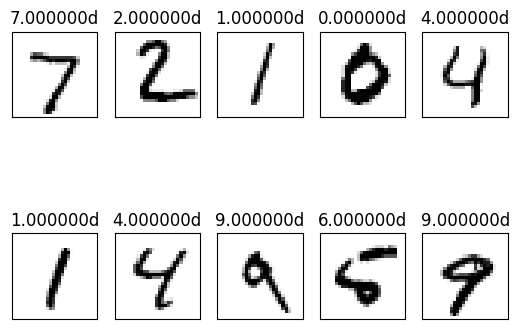

In [2]:
# Bidirection LSTM 구현

import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 로드하여 준비, 샘플 값을 정수에서 부동소수로 변환
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()



# 이미지 입력 벡터 차원 조절

train_images = train_images / 255.0
test_images = test_images / 255.0

print(train_labels[:10])


one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)



# 신경망 구
model = tf.keras.models.Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences = True), input_shape = (28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 학습 과정 설정
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습 수
history = model.fit(train_images, one_hot_train_labels, epochs=5, batch_size=10)



print("\n====================test results=====================")
labels=model.predict(test_images)
print("\n Accuracy: %.4f" % (model.evaluate(test_images, one_hot_test_labels)[1]))

fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%fd' % np.argmax(labels[i]))
  subplot.imshow(test_images[i],
                 cmap=plt.cm.gray_r)
plt.show()

print("========================================================")

[5 0 4 1 9 2 1 3 1 4]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirecti  (None, 28, 128)           47616     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 28, 128)           98816     
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 28, 128)           98816     
 onal)                                                           
                                                                 
 flatten_2 (Flatten)         (None, 3584)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                35850     
                                

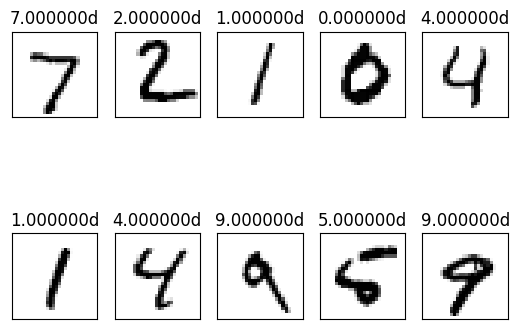

In [3]:
# Bidirection Deep Bi-LSTM 구현

import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 로드하여 준비, 샘플 값을 정수에서 부동소수로 변환
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()



# 이미지 입력 벡터 차원 조절

train_images = train_images / 255.0
test_images = test_images / 255.0

print(train_labels[:10])


one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)



# 신경망 구
model = tf.keras.models.Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences = True),input_shape = (28, 28)))
model.add(Bidirectional(LSTM(units=64, return_sequences = True)))
model.add(Bidirectional(LSTM(units=64, return_sequences = True)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 학습 과정 설정
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습 수
history = model.fit(train_images, one_hot_train_labels, epochs=5, batch_size=10)



print("\n====================test results=====================")
labels=model.predict(test_images)
print("\n Accuracy: %.4f" % (model.evaluate(test_images, one_hot_test_labels)[1]))

fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%fd' % np.argmax(labels[i]))
  subplot.imshow(test_images[i],
                 cmap=plt.cm.gray_r)
plt.show()

print("========================================================")